<a href="https://colab.research.google.com/github/thofes/judging_SJ_BA/blob/main/Mark_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

Mounted at /content.gdrive


In [36]:
#import json files 1680 and reshape Achtung data_labeled_01042022 bereits richtig geshaped

import os
import json
import numpy as np

PATH = "/content.gdrive/MyDrive/Datasets_1680"
sets = []
try:
    sets = next(os.walk(PATH))[2]
except StopIteration:
    pass

print(sets)
X = np.empty(shape=(0,1680))
y = np.empty(shape=0)

print(X,y)

for path in sets:
    path = PATH + '/' + path
    with open(path, "r") as fp:
        data1 = json.load(fp)

    # convert lists to numpy arrays
    X1 = np.array(data1["keypoints"])
    #X = np.array(data["mfcc"])
    y1 = np.array(data1["labels"])
    X1 = np.reshape(X1, (y1.shape[0],1680))
    X = np.concatenate((X,X1), axis=0)
    y = np.concatenate((y,y1), axis=0)



print(X.shape)
print(y.shape)

['data_Labeled_Max.json', 'data_Labeled_Mirror_Telemark_01042022.json', 'data_Labeled_Mirror_Telemark_09042022.json', 'data_Labeled_09042022.json']
[] []
(750, 1680)
(750,)


In [38]:
#import json files 1575

import os
import json
import numpy as np

PATH = "/content.gdrive/MyDrive/Datasets_1575"
sets = []
try:
    sets = next(os.walk(PATH))[2]
except StopIteration:
    pass

print(sets)
X = np.empty(shape=(0,1575))
y = np.empty(shape=0)



for path in sets:
    path = PATH + '/' + path
    with open(path, "r") as fp:
        data1 = json.load(fp)

    # convert lists to numpy arrays
    X1 = np.array(data1["keypoints"])
    #X = np.array(data["mfcc"])
    y1 = np.array(data1["labels"])

    X = np.concatenate((X,X1), axis=0)
    y = np.concatenate((y,y1), axis=0)



print(X.shape)
print(y.shape)

['data_manually_labeled_original.json', 'data_manually_labled_Telemark_mirror.json', 'data_Manually_Labeled_09042022.json', 'data_Manually_Labeled_mirror_09042022.json', 'data_Manually_Labeled_11042022.json']
(1082, 1575)
(1082,)


In [39]:
#Creating binary classification model
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Conv1D, Dropout, MaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.utils import shuffle

 
model = Sequential([
    Conv1D(filters=32, kernel_size=3, input_shape=(1575,1), padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(pool_size=3, strides=3), #max wert der 3 stellen und dann 3 stellen weiter wandern
    Conv1D(filters=64, kernel_size=25, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(pool_size=25, strides=25),
    LSTM(21, activation='tanh'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid') #sigmoid
])


save_callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
def scheduler(epoche, lr):
      if epoche < 2:
          return lr
      else:
          return lr*0.97
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1575, 32)          128       
                                                                 
 dropout (Dropout)           (None, 1575, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 525, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 525, 64)           51264     
                                                                 
 dropout_1 (Dropout)         (None, 525, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 21, 64)           0         
 1D)                                                    

In [40]:
history = model.fit(x=X, y=y, batch_size=40, validation_split = 0.2, epochs=1000, shuffle=True, verbose = 2, callbacks=[save_callback, lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/1000
22/22 - 8s - loss: 0.7197 - accuracy: 0.5098 - val_loss: 0.7378 - val_accuracy: 0.2442 - lr: 0.0010 - 8s/epoch - 376ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/1000
22/22 - 5s - loss: 0.7058 - accuracy: 0.5075 - val_loss: 0.7521 - val_accuracy: 0.2258 - lr: 0.0010 - 5s/epoch - 240ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0009700000460725278.
Epoch 3/1000
22/22 - 5s - loss: 0.6994 - accuracy: 0.5249 - val_loss: 0.7079 - val_accuracy: 0.2811 - lr: 9.7000e-04 - 5s/epoch - 243ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.000940900050336495.
Epoch 4/1000
22/22 - 5s - loss: 0.6926 - accuracy: 0.5468 - val_loss: 0.7471 - val_accuracy: 0.2166 - lr: 9.4090e-04 - 5s/epoch - 241ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.000912673061247915.
Epoch 5/1000
22/22 - 5s - loss: 0.6937 - accur

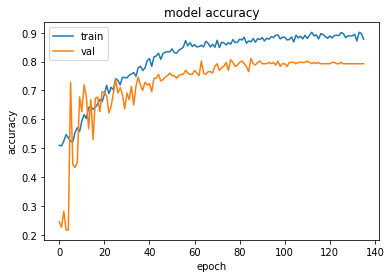

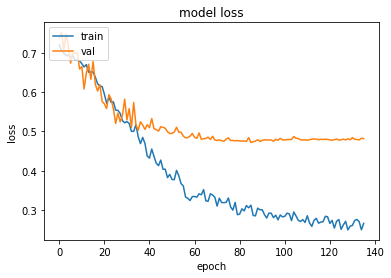

In [41]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model = keras.models.load_model('/content.gdrive/MyDrive')

In [ ]:
with open('/content.gdrive/MyDrive/Datasets/data_manually_labled_Telemark_mirror.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X2 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y2 = np.array(data2["labels"])


predictions = model.predict(X2, batch_size = 10, verbose =0)

for i in predictions:
  if i[1] < 0.5:
      print("wrong")


wrong
wrong


In [32]:
#import json files 1680 and reshape

import json
import numpy as np

#merging json files
with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_09042022.json', "r") as fp:
    data1 = json.load(fp)

# convert lists to numpy arrays
X = np.array(data1["keypoints"])
#X = np.array(data["mfcc"])
y = np.array(data1["labels"])
X = np.reshape(X, (y.shape[0],1680))


with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_Max.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])
X1 = np.reshape(X1, (y1.shape[0],1680))


X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_Mirror_Telemark_01042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])
X1 = np.reshape(X1, (y1.shape[0],1680))


X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1680/data_Labeled_Mirror_Telemark_09042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])
X1 = np.reshape(X1, (y1.shape[0],1680))


X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)
"""
with open('/content.gdrive/MyDrive/Datasets_1575/data_manually_labled_Telemark_mirror.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])
X1 = np.reshape(X1, (y1.shape[0],1680))


X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)
"""




#print(X[0])
#print(X[332])
print(X.shape)
#print(y[0])
#print(y[332])
print(y.shape)

(750, 1680)
(750,)


In [14]:
#import json files 1575

import json
import numpy as np

#merging json files
with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_09042022.json', "r") as fp:
    data1 = json.load(fp)

# convert lists to numpy arrays
X = np.array(data1["keypoints"])
#X = np.array(data["mfcc"])
y = np.array(data1["labels"])

with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_11042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])

X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_mirror_09042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])

X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1575/data_manually_labeled_original.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])

X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)

with open('/content.gdrive/MyDrive/Datasets_1575/data_manually_labled_Telemark_mirror.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X1 = np.array(data2["keypoints"])
#X = np.array(data["mfcc"])
y1 = np.array(data2["labels"])

X = np.concatenate((X,X1), axis=0)
y = np.concatenate((y,y1), axis=0)





print(X[0])
print(X[332])
print(X.shape)
print(y[0])
print(y[332])
print(y.shape)

[0.         0.         0.         ... 0.41105416 0.75302452 0.73161852]
[0.         0.         0.         ... 0.54369467 0.74955374 0.53815782]
(1082, 1575)
1
1
(1082,)
